<h1 style="text-align: center;">Lesson 8: Giới thiệu chung về học máy</h1>

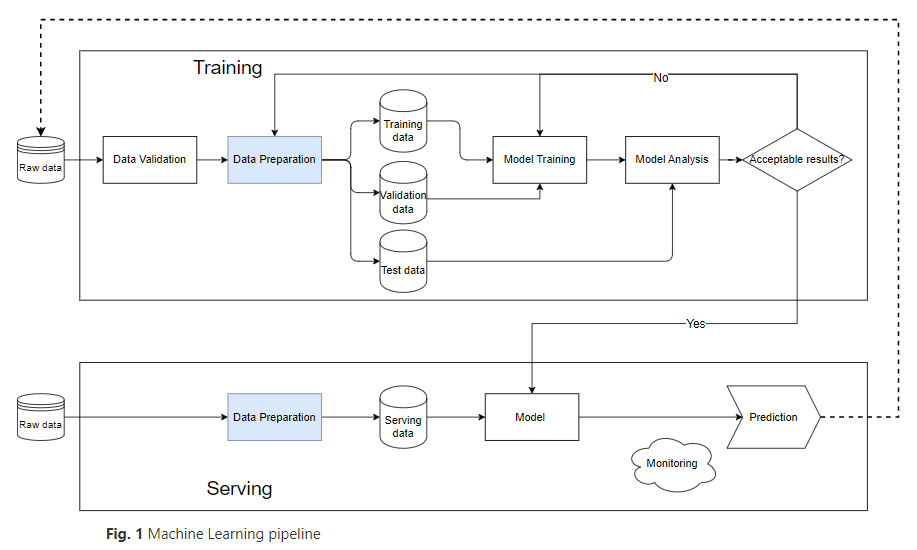

Có hai khối chính là “Training” và “Serving” thể hiện luồng dữ liệu trong quá trình huấn luyện và khi chạy thực tế.

Pha “Training”:

“Data Validation” là bước kiểm định dữ liệu. Bước này ít được nhắc tới trong các tài liệu nhưng lại rất quan trọng. Tại bước này, dữ liệu cần được kiểm tra xem có tương tự như dữ liệu hiện có trong cơ sở dữ liệu hay không. Lưu ý rằng trong các bài toán thực tế, dữ liệu mới thường xuyên được sinh ra, và mô hình cần thường xuyên được cập nhật dựa trên dữ liệu mới này để “bắt kịp xu thế”. Việc kiểm tra dữ liệu có tương tự không có thể được xác định dựa trên các thông số thống kê. Chẳng hạn với bài toán dự đoán một người dùng có click vào một quảng cáo hay không, nếu tỉ lệ click/không click hiện tại chỉ là 1% mà trong dữ liệu mới, tỉ lệ này là 50% thì nhiều khả năng dữ liệu mới chứa nhiều thông tin spam. Nếu để mô hình huấn luyện trên dữ liệu này, rất nhiều khả năng mô hình của bạn sẽ có kết quả tệ.

Qua bước kiểm định, dữ liệu thô được làm sạch, tạo đặc trưng trong bước “Data Prepration” sau đó được tách ra thành tập huấn luyện (training data) và tập kiểm định (validation data). Ngoài ra, bước này cũng có thể tạo ra một tập dữ liệu thứ ba là tập kiểm tra (test data) để xác định chất lượng mô hình sau quá trình huấn luyện. Trong nhiều trường hợp với ít dữ liệu huấn luyện, người ta thường dùng chính tập kiểm định làm tập kiểm tra. Khi đó cần thận trọng với việc tập kiểm định này bị overfit sau khi được dùng đi dùng lại để ra quyết định thay đổi mô hình.

Dữ liệu huấn luyện được đưa vào khối “Model Training” để huấn luyện mô hình. Dữ liệu kiểm định được sử dụng trong quá trình huấn luyện này để tinh chỉnh tham số (hyperparameter tuning).

Mô hình sau khi huấn luyện được đưa vào khối “Model Analysis” để phân tích chất lượng. Phần phân tích chất lượng này có thể bao gồm nhiều phần: metrics trên tập kiểm tra có tốt không, metrics trên từng phần dữ liệu có tốt tương đương nhau không, mô hình có dự đoán thiên lệch không, có hiện tượng rò rỉ dữ liệu không, tầm quan trọng của từng đặc trưng như thế nào, tốc độ dự đoán và nhiều phần phân tích khác tùy thuộc vào mỗi bài toán.

Nếu kết quả nhận được trong bước “Model Analysis” thỏa mãn các yêu cầu của bài toán, mô hình này sẽ được dùng cho việc chạy dữ liệu thực tế ở bước “Serving”. Nếu không, ta cần quay lại bước xây dựng mô hình, xây dựng thêm đặc trưng hoặc thậm chí phải lấy thêm dữ liệu.

Pha “Serving”:

Khi đã huấn luyện được một mô hình, ta có thể đưa nó vào chạy với dữ liệu mới thời gian thực. Trên thực tế, không bao giờ một mô hình mới được áp dụng ngay cho toàn bộ dữ liệu thực tế trong thời gian thực. Thay vào đó, mô hình mới chỉ được áp dụng lên một phần nhỏ của dữ liệu và so sánh chất lượng với mô hình hiện tại. Nếu chất lượng trên phần nhỏ dữ liệu này chấp nhận được, tỉ lệ dữ liệu mà mô hình mới dự đoán được nâng dần lên tới khi nó được chạy trên toàn bộ dữ liệu.

Trong pha này, bước “Data Preparation” để làm sạch và tạo dữ liệu phải giống hệt như những gì đã được làm để xây dựng mô hình trong pha “Training”. Ta cần đảm bảo dữ liệu đầu vào của mô hình có những tính chất giống hệt như những gì nó được nhìn thấy trong quá trình huấn luyện. Toàn bộ cách làm sạch, cách chuẩn hóa, mã hóa đặc trưng cần phải được thực hiện tương tự.

Kết quả mà mô hình dự đoán có thể ảnh hưởng trực tiếp đến hành vi người dùng. Phản ứng của người dùng, trong rất nhiều trường hợp, được dùng để huấn luyện những mô hình tiếp theo. Lấy ví dụ bài toán gợi ý sản phẩm, mô hình có tác dụng xếp hạng các sản phẩm theo thứ tự ưa thích của người dùng. Người dùng thường sẽ có những hành động phụ thuộc mạnh vào kết quả xếp hạng đó. Toàn bộ các trường thông tin khi mô hinh dự đoán cũng như phản ứng của người dùng sẽ được lưu lại để làm dữ liệu huấn luyện cho các mô hình tiếp theo. Như vậy, có một quan hệ khăng khít giữa chất lượng dữ liệu và chất lượng mô hình. Việc có một thành phần giúp theo dõi dự đoán của mô hình cũng như phản ứng của người dùng là cực kỳ quan trọng trong nhiều bài toán. Đó là thành phần “Monitoring” trong hình.

Mỗi bài toán khác nhau cần có một hệ thống theo dõi và cảnh báo khác nhau. Thường thì với bất kể dữ liệu đầu vào như thế nào, mô hình vẫn sẽ cho ra một kết quả dự đoán, có thể là ngẫu nhiên. Nếu các kết quả này không được theo dõi và báo động một cách kỹ lưỡng dẫn đến việc chất lượng mô hình cũng như phản ứng của người dùng thay đổi một cách đột ngột thì uy tín cũng như doanh thu của công ty sẽ bị ảnh hưởng trầm trọng.